### Import necessary packages

In [1]:
import openpyxl
import math
import io
import os
import json
import calendar


import pandas as pd
import numpy as np

import csv
from csv import DictReader
from openpyxl import Workbook, load_workbook
from datetime import date, datetime
from pathlib import Path
from itertools import chain
import matplotlib.pyplot as plt

# Github Link

### To view the source code for this project, click the link here: https://github.com/Aaron-M-R/Budget

### To use the program, run the cells below and fill in the necessary information

In [2]:
%load_ext autoreload
%autoreload 2

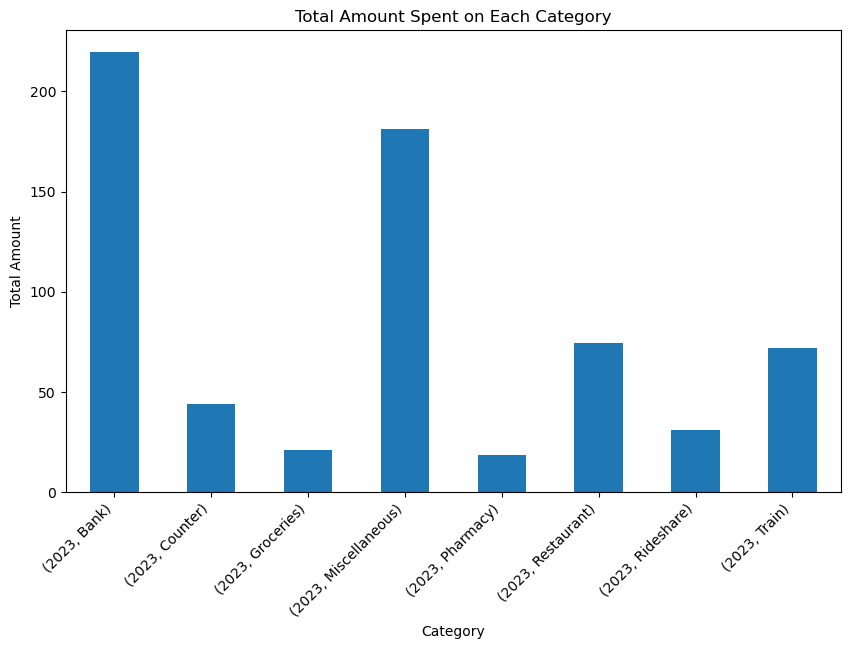

In [3]:
from BudgeJudy import *

### Read in spreadsheet from data folder

In [4]:
df.head()

,Date,Category,Subcategory,Code,Amount,RunningBalance,Year,Month,Day
0,2023-02-28,miscellaneous,Bank,INTADJUST,0.14,268.51,2023,2,28
1,2023-02-28,miscellaneous,Bank,ATM,3.50,268.37,2023,2,28
2,2023-02-26,food,Restaurant,BURGER,-9.54,264.87,2023,2,26
3,2023-02-23,miscellaneous,Bank,ATM,-23.50,274.41,2023,2,23
4,2023-02-21,pharmacy,Pharmacy,CVS,-15.95,297.91,2023,2,21


### Read in category dictionary

In [5]:
# Convert and write JSON object to file

# path = Path("Data") / "category_descriptions.json"
# with open(path, "w") as outfile: 
#     json.dump(categories, outfile)

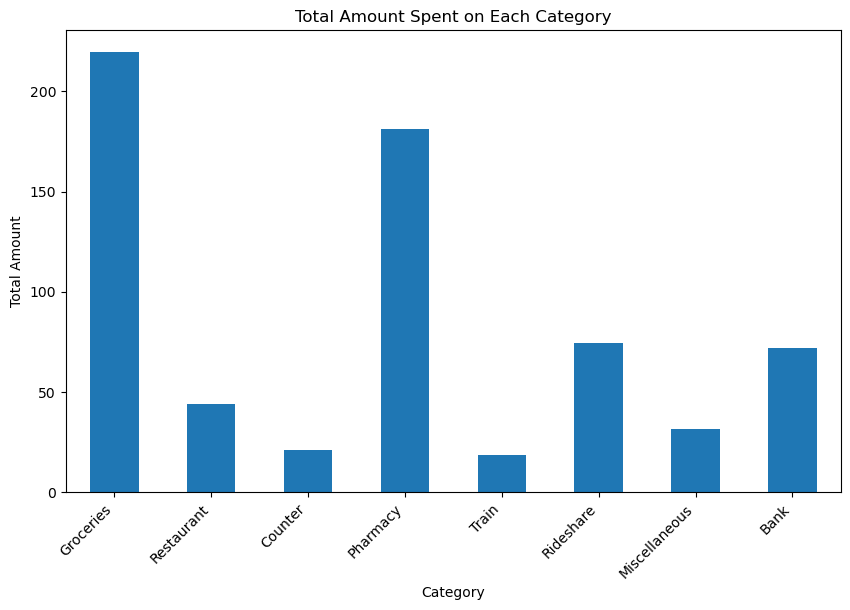

In [15]:
plot_df = totals.copy()[['Total']]
plot_df['Total'] = plot_df['Total'].apply(lambda x: -x)
plot_df.plot(kind='bar', legend=None, figsize=(10, 6))
plt.title('Total Amount Spent on Each Category')
plt.xlabel('Category')
plt.ylabel('Total Amount')
plt.xticks(rotation=45, ha='right')
plt.show()

In [6]:
totals

Amount           Total
Month              February January        
Year Subcategory                           
2023 Bank            -19.86 -199.67 -219.53
     Counter           0.00  -44.16  -44.16
     Groceries       -14.48   -6.67  -21.15
     Miscellaneous   -74.80 -106.48 -181.28
     Pharmacy        -15.95   -2.54  -18.49
     Restaurant      -19.77  -54.54  -74.31
     Rideshare       -31.26    0.00  -31.26
     Train           -72.00    0.00  -72.00

In [7]:
cats = [list(item[1].keys()) for item in list(categories.items())]
cats = list(chain.from_iterable(cats))

used_cats = list(totals.reset_index()['Subcategory'])

In [8]:
totals.index = [thing for thing in cats if thing in used_cats]

In [9]:
totals

Amount           Total
Month         February January        
Groceries       -19.86 -199.67 -219.53
Restaurant        0.00  -44.16  -44.16
Counter         -14.48   -6.67  -21.15
Pharmacy        -74.80 -106.48 -181.28
Train           -15.95   -2.54  -18.49
Rideshare       -19.77  -54.54  -74.31
Miscellaneous   -31.26    0.00  -31.26
Bank            -72.00    0.00  -72.00

In [10]:
df

,Date,Category,Subcategory,Code,Amount,RunningBalance,Year,Month,Day
0,2023-02-28,miscellaneous,Bank,INTADJUST,0.14,268.51,2023,2,28
1,2023-02-28,miscellaneous,Bank,ATM,3.50,268.37,2023,2,28
2,2023-02-26,food,Restaurant,BURGER,-9.54,264.87,2023,2,26
3,2023-02-23,miscellaneous,Bank,ATM,-23.50,274.41,2023,2,23
4,2023-02-21,pharmacy,Pharmacy,CVS,-15.95,297.91,2023,2,21
5,2023-02-21,miscellaneous,Miscellaneous,INTADJUST,-20.00,313.86,2023,2,21
6,2023-02-20,miscellaneous,Miscellaneous,INTADJUST,-4.99,333.86,2023,2,20
7,2023-02-19,miscellaneous,Miscellaneous,INTADJUST,-30.16,338.85,2023,2,19
8,2023-02-18,food,Groceries,VON,-14.48,369.01,2023,2,18
9,2023-02-17,transportation,Rideshare,UBER,-4.07,383.49,2023,2,17


In [11]:
cat = ['food', 'pharmacy']
new_df = pd.DataFrame()
for categ in cat:
    new_df = pd.concat([df[df['Category']==categ], new_df])
    
new_df

,Date,Category,Subcategory,Code,Amount,RunningBalance,Year,Month,Day
4,2023-02-21,pharmacy,Pharmacy,CVS,-15.95,297.91,2023,2,21
34,2023-01-14,pharmacy,Pharmacy,TARGET,-2.54,937.06,2023,1,14
2,2023-02-26,food,Restaurant,BURGER,-9.54,264.87,2023,2,26
8,2023-02-18,food,Groceries,VON,-14.48,369.01,2023,2,18
12,2023-02-06,food,Restaurant,BURGER,-10.23,486.75,2023,2,6
21,2023-01-29,food,Groceries,VON,-6.67,693.2,2023,1,29
29,2023-01-17,food,Restaurant,CAFE,-27.22,855.03,2023,1,17
33,2023-01-14,food,Restaurant,BURGER,-8.73,928.33,2023,1,14
35,2023-01-13,food,Restaurant,CURRY,-8.62,939.6,2023,1,13
37,2023-01-10,food,Restaurant,BURGER,-9.97,970.22,2023,1,10


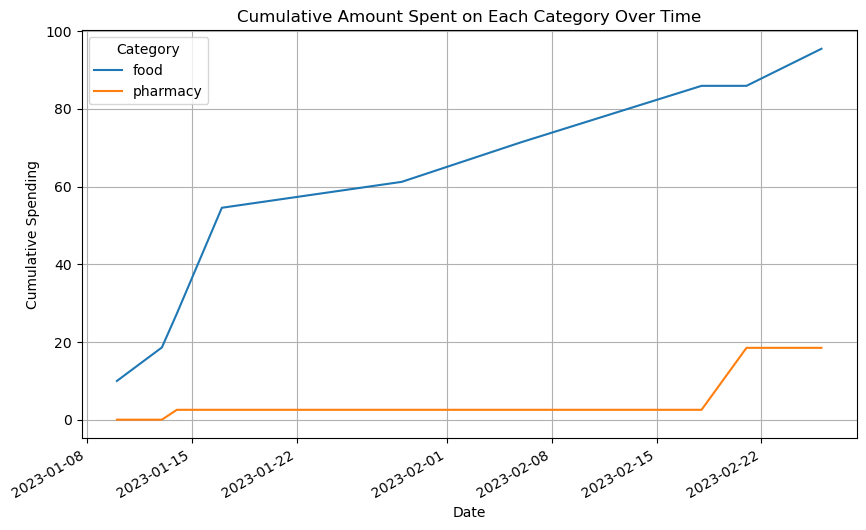

In [12]:
cat_plot(['pharmacy', 'food'], df)

In [13]:
totals

Amount           Total
Month         February January        
Groceries       -19.86 -199.67 -219.53
Restaurant        0.00  -44.16  -44.16
Counter         -14.48   -6.67  -21.15
Pharmacy        -74.80 -106.48 -181.28
Train           -15.95   -2.54  -18.49
Rideshare       -19.77  -54.54  -74.31
Miscellaneous   -31.26    0.00  -31.26
Bank            -72.00    0.00  -72.00

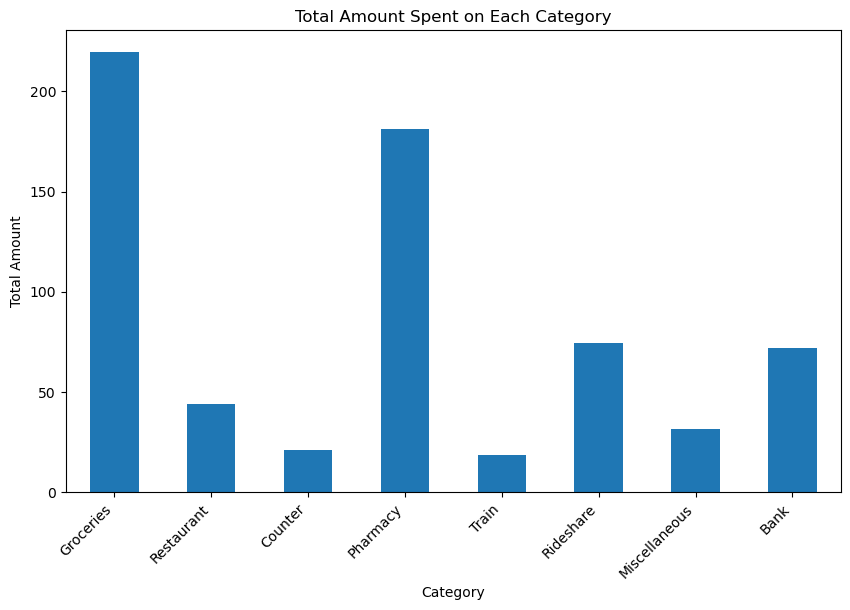

In [14]:
plot_df = totals.copy()[['Total']]
plot_df['Total'] = plot_df['Total'].apply(lambda x: -x)
plot_df.plot(kind='bar', legend=None, figsize=(10, 6))
plt.title('Total Amount Spent on Each Category')
plt.xlabel('Category')
plt.ylabel('Total Amount')
plt.xticks(rotation=45, ha='right')
plt.show()